In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import sklearn
import numpy as np
import scipy
import warnings

from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

In [2]:
color_set = ['#F44336', '#9C27B0', '#2196F3', '#00BCD4', '#009688', '#4CAF50',
            '#CDDC39', '#FFC107', '#FF9800', '#795548', '#9E9E9E', '#FF9E80',
            '#00E676', '#1DE9B6', '#29B6F6', '#B388FF', '#D500F9', '#FF4081',
            '#FFCDD2', '#880E4F', '#90CAF9', '#4DD0E1', '#E6EE9C', '#00E676',
            '#FF9800', '#FF8A65', '#8D6E63', '#E0E0E0', '#546E7A', '#FFFF00']

def set_colors(labels, colors=color_set): #colors='rgbykcm' (rimosso k per il noise)
    colored_labels = []
    for label in labels:
        if label == -1:
            colored_labels.append('k')
        else:
            colored_labels.append(colors[label])
    return colored_labels

def draw_scatter_plot(data1, data2, label1, label2, dbscan_labels, plot_title):
    colors = set_colors(dbscan_labels)
    
    plt.subplots(1, 1, figsize=(16,12))
    scatter_plot = plt.scatter(data1, data2, c=colors)
    plt.title(plot_title)
    plt.xlabel(label1)
    plt.ylabel(label2)
    
    return scatter_plot

def draw_3d_scatter_plot(data1, data2, data3, label1, label2, label3, dbscan_labels, plot_title):
    colors = set_colors(dbscan_labels)  
    fig = plt.figure(figsize=(16,12))
    ax = Axes3D(fig)
    
    scatter_plot = ax.scatter(data1, data2, data3, c=colors)
    plt.title(plot_title)
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    ax.set_zlabel(label3)
    return scatter_plot

#min_max normalization su df_train
def normalize(attribute, min_attribute, max_attribute):
    result = []
    for i in attribute:
        new_value = (i - min_attribute)/(max_attribute - min_attribute)*(1-0)+0
        result.append(new_value)
    return result

In [3]:
warnings.filterwarnings('ignore')
min_max_scaler = preprocessing.MinMaxScaler()

In [4]:
csv = pd.read_csv('HR.csv')

In [5]:
# Preparazione dati

sample_val = 5000
csv2 = csv
dropped_attributes = ['Work_accident',
                     'promotion_last_5years',
                     'sales',
                     'salary',
                     'left'
                    ]

csv_sample = csv.sample(sample_val)

csv_sample = csv_sample.drop(dropped_attributes, axis=1)
csv2 = csv2.drop(dropped_attributes, axis=1)


#for k in csv_sample.columns:
#    csv_sample[k] = min_max_scaler.fit_transform(csv_sample[k].values.astype(float))

#for k in csv2.columns:
#    csv2[k] = min_max_scaler.fit_transform(csv2[k].values.astype(float))

In [6]:
#creazione di average_daily_hours
csv2['average_daily_hours']=csv2['average_montly_hours']/21.5
csv2=csv2.drop(['average_montly_hours'], axis=1)
csv2.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,average_daily_hours
0,0.38,0.53,2,3,7.302326
1,0.80,0.86,5,6,12.186047
2,0.11,0.88,7,4,12.651163
3,0.72,0.87,5,5,10.372093
4,0.37,0.52,2,3,7.395349


In [7]:
min_number_project = min(csv2['number_project'])
max_number_project = max(csv2['number_project'])

min_time_spend_company = min(csv2['time_spend_company'])
max_time_spend_company = max(csv2['time_spend_company'])

min_average_daily_hours = min(csv2['average_daily_hours'])
max_average_daily_hours = max(csv2['average_daily_hours'])

csv2['normalized_number_project']=normalize(csv2['number_project'], min_number_project, max_number_project)
csv2= csv2.drop(['number_project'], axis=1)

csv2['normalized_time_spend_company']=normalize(csv2['time_spend_company'], min_time_spend_company, max_time_spend_company)
csv2= csv2.drop(['time_spend_company'], axis=1)

csv2['normalized_average_daily_hours']=normalize(csv2['average_daily_hours'], min_average_daily_hours, max_average_daily_hours)
csv2= csv2.drop(['average_daily_hours'], axis=1)

csv2.head()

,satisfaction_level,last_evaluation,normalized_number_project,normalized_time_spend_company,normalized_average_daily_hours
0,0.38,0.53,0,0,0.285047
1,0.80,0.86,0,0,0.775701
2,0.11,0.88,1,0,0.822430
3,0.72,0.87,0,0,0.593458
4,0.37,0.52,0,0,0.294393


In [8]:
# DBSCAN

#preparazione DBScan

dbscan1 = DBSCAN(eps=0.05, min_samples=80)  # LAST_EVALUATION and SATISFACTION_LEVEL
dbscan2 = DBSCAN(eps=0.047, min_samples=90) # AVERAGE_MONHTLY_HOURS and LAST_EVALUATION
dbscan3 = DBSCAN(eps=0.046, min_samples=77) # SATISFACTION_LEVEL AND AVERAGE_MONTHLY_HOURS
dbscan4 = DBSCAN(eps=0.5, min_samples=90)   # SATISFACTION_LEVEL and TIME_SPEND_COMPANY
dbscan5 = DBSCAN(eps=0.5, min_samples=90)   # LAST_EVALUATION and TIME_SPEND_COMPANY
dbscan6 = DBSCAN(eps=0.5, min_samples=90)   # AVERAGE_MONTHLY_HOURS and TIME_SPEND_COMPANY

#dati campionati
#sel_sample1 = csv_sample[["satisfaction_level", "last_evaluation"]]
#sel_sample2 = csv_sample[["average_montly_hours", "last_evaluation"]]
#sel_sample3 = csv_sample[["satisfaction_level", "average_montly_hours"]]
#sel_sample4 = csv_sample[["satisfaction_level", "time_spend_company"]]
#sel_sample5 = csv_sample[["last_evaluation", "time_spend_company"]]
#sel_sample6 = csv_sample[["average_montly_hours", "time_spend_company"]]

#dataset intero
#sel1 = csv2[["satisfaction_level", "last_evaluation"]]
#sel2 = csv2[["average_montly_hours", "last_evaluation"]]
#sel3 = csv2[["satisfaction_level", "average_montly_hours"]]
#sel4 = csv2[["satisfaction_level", "time_spend_company"]]
#sel5 = csv2[["last_evaluation", "time_spend_company"]]
#sel6 = csv2[["average_montly_hours", "time_spend_company"]]

#esecuzione DBSCAN
#scan1 = dbscan1.fit(sel1)
#scan2 = dbscan2.fit(sel2)
#scan3 = dbscan3.fit(sel3)
#scan4 = dbscan4.fit(sel4)
#scan5 = dbscan5.fit(sel5)
#scan6 = dbscan6.fit(sel6)

#silhouette
#silhouette_csv_1 = csv2.drop(['average_montly_hours','time_spend_company'], axis=1)
#silhouette_csv_2 = csv2.drop(['satisfaction_level','time_spend_company'], axis=1)
#silhouette_csv_3 = csv2.drop(['last_evaluation', 'time_spend_company'], axis=1)

#silhouette1 = sklearn.metrics.silhouette_score(silhouette_csv_1, scan1.labels_)
#silhouette2 = sklearn.metrics.silhouette_score(silhouette_csv_2, scan2.labels_)
#silhouette3 = sklearn.metrics.silhouette_score(silhouette_csv_3, scan3.labels_)

#print('SILHOUETTE (last_evaluation and satisfaction_level): ' + str(silhouette1))
#print('SILHOUETTE (average_monthly_hours and last_evaluation): ' + str(silhouette2))
#print('SILHOUETTE (satisfaction_level and average_monthly_hours): ' + str(silhouette3))

In [9]:
# Visualizzazione

#plot_sample1 = draw_scatter_plot(csv2["satisfaction_level"],
#                                 csv2["last_evaluation"],
#                                 'Satisfaction Level',
#                                 'Last Evaluation',
#                                  scan1.labels_,
#                                 'Satisfaction Level and Last Evaluation')

#plt.subplots(1, 1, figsize=(16,12))
#scatter_plot = plt.scatter(csv2["satisfaction_level"], csv2["last_evaluation"])
#plt.title('Satisfaction Level and Last Evaluation')
#plt.xlabel('Satisfaction Level')
#plt.ylabel('Last Evaluation')


#plot_sample2 = draw_scatter_plot(csv2['average_montly_hours'],
#                                 csv2['last_evaluation'],
#                                 'Average Monthly Hours',
#                                 'Last Evaluation',
#                                 scan2.labels_,
#                                 'Average Monthly Hours and Last Evaluation')

#plot_sample3 = draw_scatter_plot(csv2['satisfaction_level'],
#                                 csv2['average_montly_hours'],
#                                 'Satisfaction Level',
#                                 'Average Monthly Hours',
#                                 scan3.labels_,
#                                 'Satisfaction Level and Average Monthly Hours')


#plot_sample4 = draw_scatter_plot(csv2['satisfaction_level'],
#                                 csv2['time_spend_company'],
#                                 'Satisfaction Level',
#                                 'Time Spent Company',
#                                 scan4.labels_,
#                                 'Satisfaction Level and Time Spent Company')

#plot_sample5 = draw_scatter_plot(csv2['last_evaluation'],
#                                 csv2['time_spend_company'],
#                                 'Last Evaluation',
#                                 'Time Spent Company',
#                                 scan5.labels_,
#                                 'Last Evaluation and Time Spent Company')

#plot_sample6 = draw_scatter_plot(csv2['average_montly_hours'],
#                                 csv2['time_spend_company'],
#                                 'Average Monthly Hours',
#                                 'Time Spent Company',
#                                 scan6.labels_,
#                                 'Average Monthly Hours and Time Spent Comapny')

In [10]:
#sel_3d_1 = sel1 = csv2[["satisfaction_level", "last_evaluation", "average_montly_hours"]]
#dbscan_3d_1 = DBSCAN(eps=0.07, min_samples=90)
#scan_3d_1 = dbscan_3d_1.fit(sel_3d_1)

#silhouette_csv_3d_1 = csv2.drop(['average_montly_hours'], axis=1)
#silhouette_3d_1 = sklearn.metrics.silhouette_score(silhouette_csv_3d_1, scan_3d_1.labels_)
#print('SILHOUETTE (last_evaluation and satisfaction_level and average monthly hours): ' + str(silhouette_3d_1))

#plot_3d_1 = draw_3d_scatter_plot(csv2['satisfaction_level'],
#                                 csv2['last_evaluation'],
#                                 csv2['average_montly_hours'],
#                                'Satisfaction Level',
#                                'Last Evaluation',
#                                'Average Monthly Hours',
#                                scan_3d_1.labels_,
#                                'Satisfaction Level and Last Evaluation and Average Monthly Hours')




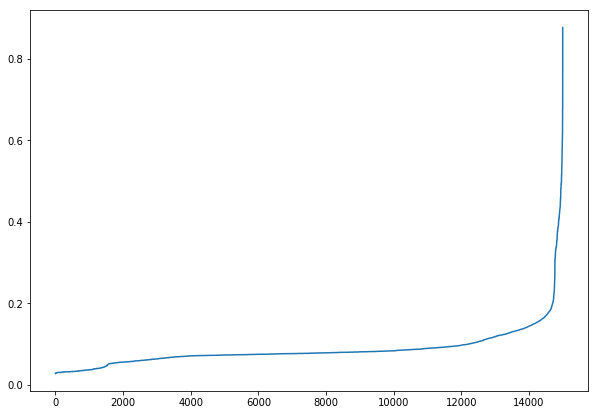

In [12]:
minPts = 90
#prova1 = csv2.drop(['average_montly_hours', 'time_spend_company'], axis=1)

nbrs = NearestNeighbors(n_neighbors=minPts, algorithm='auto').fit(csv2)
distances, indices = nbrs.kneighbors(csv2)

new_distances = []
new_indices = []

for a, b in zip(distances, indices):
    new_distances.append(a[-1])
    new_indices.append(b[-1])


new_distances = sorted(new_distances)

plt.subplots(1, 1, figsize=(10,7))
scatter_plot = plt.plot(range(len(new_distances)), new_distances)

In [ ]:
epsilon = 0.23

dbscan_all = DBSCAN(eps=epsilon, min_samples=minPts) #tutti
scan_all = dbscan_all.fit(csv2)

silhouette_all = sklearn.metrics.silhouette_score(csv2, scan_all.labels_)

print('minPts: ' + str(minPts) + ' | eps: ' + str(epsilon) + ' | silhouette: ' + str(silhouette_all))
print('---------------')
print(Counter(scan_all.labels_)) #decommentare per vedere la distribuzione dei cluster e dei noise

minPts: 90 | eps: 0.23 | silhouette: 0.562476503755
---------------
Counter({0: 14529, 1: 238, -1: 232})


In [ ]:
csv_and_dbscan = csv2.assign(cluster=scan_all.labels_)

plt.subplots(1, 1, figsize=(10,7))
prova = parallel_coordinates(csv_and_dbscan, 'cluster')

KeyboardInterrupt: 